In [1]:
#importing all the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import tensorflow as tf
import gensim
import nltk
import pyLDAvis


In [2]:
#importing the dataset

rawTweets = pd.read_csv('Corona_NLP_train.csv', encoding='latin-1')

In [3]:
#cleaining and preprocessing the train data

trainSet = rawTweets[['OriginalTweet', 'TweetAt', 'Sentiment']]

trainSet['processedTweet'] = \
trainSet['OriginalTweet'].map(lambda x: re.sub('[,\.!?#]', '', x))

trainSet['processedTweet'] = \
trainSet['processedTweet'].map(lambda x: x.lower())

trainSet['processedTweet'] = \
trainSet['processedTweet'].map(lambda x: re.sub('https:\S*', '', x))

trainSet['processedTweet'] = \
trainSet['processedTweet'].map(lambda x: re.sub('[^\w\s_]|_|\d', '', x))

trainSet['processedTweet'] = \
trainSet['processedTweet'].map(lambda x: re.sub('@\S*', '', x))

trainSet['processedTweet'] = \
trainSet['processedTweet'].map(lambda x: re.sub('\s+', ' ', x))

trainSet['processedTweet'].head()

<>:4: DeprecationWarning: invalid escape sequence \.
<>:10: DeprecationWarning: invalid escape sequence \S
<>:13: DeprecationWarning: invalid escape sequence \w
<>:16: DeprecationWarning: invalid escape sequence \S
<>:19: DeprecationWarning: invalid escape sequence \s
<>:4: DeprecationWarning: invalid escape sequence \.
<>:10: DeprecationWarning: invalid escape sequence \S
<>:13: DeprecationWarning: invalid escape sequence \w
<>:16: DeprecationWarning: invalid escape sequence \S
<>:19: DeprecationWarning: invalid escape sequence \s
/var/folders/2d/b157kfk13tdgdf2lk9rjjjth0000gn/T/ipykernel_90468/2979716371.py:4: DeprecationWarning: invalid escape sequence \.
  trainSet['OriginalTweet'].map(lambda x: re.sub('[,\.!?#]', '', x))
/var/folders/2d/b157kfk13tdgdf2lk9rjjjth0000gn/T/ipykernel_90468/2979716371.py:10: DeprecationWarning: invalid escape sequence \S
  trainSet['processedTweet'].map(lambda x: re.sub('https:\S*', '', x))
/var/folders/2d/b157kfk13tdgdf2lk9rjjjth0000gn/T/ipykernel_9046

0                 menyrbie philgahan chrisitv and and 
1    advice talk to your neighbours family to excha...
2    coronavirus australia woolworths to give elder...
3    my food stock is not the only one which is emp...
4    me ready to go at supermarket during the covid...
Name: processedTweet, dtype: object

In [4]:
#importing, cleaning and preprocessing the test data

test = pd.read_csv('Corona_NLP_test.csv', encoding='latin-1')

test = test[['OriginalTweet', 'TweetAt', 'Sentiment']]

test['processedTweet'] = \
test['OriginalTweet'].map(lambda x: re.sub('[,\.!?#]', '', x))

test['processedTweet'] = \
test['processedTweet'].map(lambda x: x.lower())

test['processedTweet'] = \
test['processedTweet'].map(lambda x: re.sub('https:\S*', '', x))

test['processedTweet'] = \
test['processedTweet'].map(lambda x: re.sub('[^\w\s_]|_|\d', '', x))

test['processedTweet'] = \
test['processedTweet'].map(lambda x: re.sub('@\S*', '', x))

test['processedTweet'] = \
test['processedTweet'].map(lambda x: re.sub('\s+', ' ', x))

test['processedTweet'].head()

<>:6: DeprecationWarning: invalid escape sequence \.
<>:12: DeprecationWarning: invalid escape sequence \S
<>:15: DeprecationWarning: invalid escape sequence \w
<>:18: DeprecationWarning: invalid escape sequence \S
<>:21: DeprecationWarning: invalid escape sequence \s
<>:6: DeprecationWarning: invalid escape sequence \.
<>:12: DeprecationWarning: invalid escape sequence \S
<>:15: DeprecationWarning: invalid escape sequence \w
<>:18: DeprecationWarning: invalid escape sequence \S
<>:21: DeprecationWarning: invalid escape sequence \s
/var/folders/2d/b157kfk13tdgdf2lk9rjjjth0000gn/T/ipykernel_90468/1532997619.py:6: DeprecationWarning: invalid escape sequence \.
  test['OriginalTweet'].map(lambda x: re.sub('[,\.!?#]', '', x))
/var/folders/2d/b157kfk13tdgdf2lk9rjjjth0000gn/T/ipykernel_90468/1532997619.py:12: DeprecationWarning: invalid escape sequence \S
  test['processedTweet'].map(lambda x: re.sub('https:\S*', '', x))
/var/folders/2d/b157kfk13tdgdf2lk9rjjjth0000gn/T/ipykernel_90468/153299

0    trending new yorkers encounter empty supermark...
1    when i couldnt find hand sanitizer at fred mey...
2    find out how you can protect yourself and love...
3    panic buying hits newyork city as anxious shop...
4    toiletpaper dunnypaper coronavirus coronavirus...
Name: processedTweet, dtype: object

In [5]:
# After some basic preprocessing, I used the following code to obtain emotions...
# for each tweet using OpenAI's one shot classifier.

'''

trainEmot = train[['processedTweet', 'Sentiment']]
trainEmot["Emotion"] = "str"

import os
import openai
#openai.api_key = "OPEANAIAPIKEY"

for n in range(0, len(train)):
  train["Emotion"].iloc[n] = openai.Classification.create(
    search_model="ada",
    model="curie",
    examples=[["It is really frustrating", "Angry"]],
    query=str(trainEmot['processedTweet'].iloc[n]),
    labels=['Angry', 'Fear', 'Happy', 'Sad', 'Surprise'],
  )['label']

'''

# These results are saved in the trainedEmotions file, which we can load...
# without invoking the API for doing the same task again

emotions = pd.read_csv('trainedEmotions.csv')

emotions.head()

,processedTweet,Sentiment,Emotion
0,menyrbie philgahan chrisitv and and,Neutral,Fear
1,advice talk to your neighbours family to excha...,Positive,Fear
2,coronavirus australia woolworths to give elder...,Positive,Fear
3,my food stock is not the only one which is emp...,Positive,Fear
4,me ready to go at supermarket during the covid...,Extremely Negative,Fear


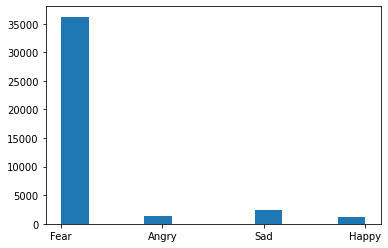

In [6]:
#plotting the obtained emotions

plt.hist(emotions['Emotion'], bins= 11)
plt.show()

In [7]:
#defined a function to be used later to show the learning history of the model

%matplotlib inline

def show_history(h):
    epochs_trained = len(h.history['loss'])
    plt.figure(figsize=(16, 6))

    plt.subplot(1, 2, 1)
    plt.plot(range(0, epochs_trained), h.history.get('accuracy'), label='Training')
    plt.plot(range(0, epochs_trained), h.history.get('val_accuracy'), label='Validation')
    plt.ylim([0., 1.])
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(range(0, epochs_trained), h.history.get('loss'), label='Training')
    plt.plot(range(0, epochs_trained), h.history.get('val_loss'), label='Validation')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

In [8]:
#splitting the original test data into validation and test sets

testSet, valSet = test.iloc[:int(len(test)*0.8)], test.iloc[int(len(test)*0.8):]

In [9]:
train = emotions
val = valSet
test = testSet

In [10]:
tweets, labels = train['processedTweet'], train['Sentiment']
tweets.head(), labels.head()

(0                 menyrbie philgahan chrisitv and and 
 1    advice talk to your neighbours family to excha...
 2    coronavirus australia woolworths to give elder...
 3    my food stock is not the only one which is emp...
 4    me ready to go at supermarket during the covid...
 Name: processedTweet, dtype: object,
 0               Neutral
 1              Positive
 2              Positive
 3              Positive
 4    Extremely Negative
 Name: Sentiment, dtype: object)

In [11]:
#tokenizing the tweets

from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words = 10000, oov_token = '<UNK>')
tokenizer.fit_on_texts(tweets)

tokenizer.texts_to_sequences([tweets.iloc[0]])

[[1, 1, 1, 4, 4]]

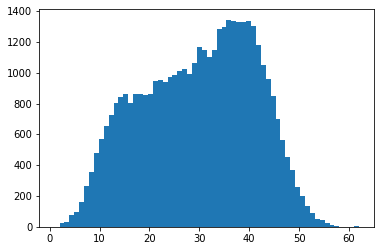

In [12]:
#plotting the length of the tweets

lengths = [len(t.split(' ')) for t in tweets]
plt.hist(lengths, bins = len(set(lengths)))
plt.show()

In [13]:
#definig a function for padding the tweets

maxlen = 50

from tensorflow.keras.preprocessing.sequence import pad_sequences

def getSequences(tokenizer, tweets):
  sequences = tokenizer.texts_to_sequences(tweets)
  padded = pad_sequences(sequences, truncating = 'post', padding = 'post', maxlen=maxlen)
  return padded

In [14]:
#padding the tweets using the function defined above

padTrainSeq = getSequences(tokenizer, tweets)
padTrainSeq[100]

classes = set(labels)
classes

{'Extremely Negative', 'Extremely Positive', 'Negative', 'Neutral', 'Positive'}

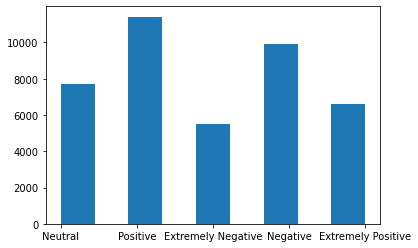

In [15]:
#plotting the distribution of the classes

plt.hist(labels, bins= 9)
plt.show()

In [16]:
#created index-to-class and class-to-index dictionaries

classToIndex = dict((c, i) for i, c in enumerate(classes))
indexToClass = dict((c, i) for i, c in classToIndex.items())

classToIndex, indexToClass

({'Positive': 0,
  'Extremely Negative': 1,
  'Neutral': 2,
  'Extremely Positive': 3,
  'Negative': 4},
 {0: 'Positive',
  1: 'Extremely Negative',
  2: 'Neutral',
  3: 'Extremely Positive',
  4: 'Negative'})

In [17]:
#a function to use apply dictionaries on desired data later

namesToIDs = lambda labels: np.array([classToIndex.get(x) for x in labels])

trainLabels = namesToIDs(labels)
trainLabels[0]

2

In [18]:
#sentiment analysis model instantiation and compilation

model = tf.keras.models.Sequential([
        tf.keras.layers.Embedding(10000, 20, input_length=maxlen),                            
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20, return_sequences=True)),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20)),
        tf.keras.layers.Dense(6, activation='softmax')
])

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

2022-05-19 03:34:40.296215: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [19]:
#defining the validation data input and laels and converting the labels into indices

valTweets, valLabels = val['processedTweet'], val['Sentiment']
valSeq = getSequences(tokenizer, valTweets)
valLabels = namesToIDs(valLabels)

valTweets, valLabels

(3038    as retail foot traffic reduces due to current ...
 3039    listening to prof andrew cunningham zsl on the...
 3040     meter rule italy distantimauniti supermarket ...
 3041    tracybeanz feels like weâre willing to destroy...
 3042    if you are doing online grocery shopping where...
                               ...                        
 3793    meanwhile in a supermarket in israel people da...
 3794    did you panic buy a lot of nonperishable items...
 3795    asst prof of economics cconces was on nbcphila...
 3796    gov need to do somethings instead of biar je r...
 3797    i and forestandpaper members are committed to ...
 Name: processedTweet, Length: 760, dtype: object,
 array([3, 4, 2, 4, 2, 3, 4, 0, 2, 4, 1, 3, 3, 1, 3, 4, 1, 0, 2, 4, 0, 3,
        4, 0, 4, 4, 1, 1, 2, 4, 1, 0, 3, 2, 3, 4, 3, 0, 0, 4, 4, 1, 2, 4,
        4, 0, 1, 3, 4, 0, 0, 0, 1, 4, 3, 1, 2, 1, 2, 2, 0, 4, 3, 1, 3, 1,
        3, 0, 1, 0, 4, 1, 2, 2, 2, 4, 0, 2, 3, 3, 4, 3, 4, 2, 1, 2, 3, 1,
    

In [20]:
    #fitting the training data to the previously created instace of the model
    
    h = model.fit(
        padTrainSeq, trainLabels,
        validation_data=(valSeq, valLabels),
        epochs=20,
        callbacks = [
                    tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience = 2)
        ]
    )

    model.summary()

Epoch 1/20
1287/1287 [==============================] - 50s 34ms/step - loss: 1.1677 - accuracy: 0.5117 - val_loss: 0.8655 - val_accuracy: 0.6829
Epoch 2/20
1287/1287 [==============================] - 42s 32ms/step - loss: 0.6786 - accuracy: 0.7605 - val_loss: 0.7539 - val_accuracy: 0.7224
Epoch 3/20
1287/1287 [==============================] - 43s 34ms/step - loss: 0.5545 - accuracy: 0.8153 - val_loss: 0.7219 - val_accuracy: 0.7250
Epoch 4/20
1287/1287 [==============================] - 40s 31ms/step - loss: 0.4864 - accuracy: 0.8406 - val_loss: 0.7297 - val_accuracy: 0.7447
Epoch 5/20
1287/1287 [==============================] - 40s 31ms/step - loss: 0.4228 - accuracy: 0.8627 - val_loss: 0.6928 - val_accuracy: 0.7724
Epoch 6/20
1287/1287 [==============================] - 39s 31ms/step - loss: 0.3719 - accuracy: 0.8796 - val_loss: 0.7159 - val_accuracy: 0.7539
Epoch 7/20
1287/1287 [==============================] - 40s 31ms/step - loss: 0.3240 - accuracy: 0.8965 - val_loss: 0.7750 -

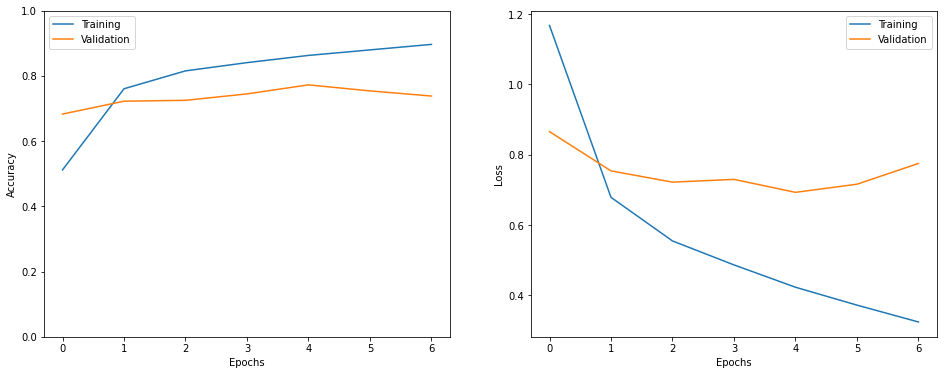

In [21]:
#showing the history of the model-fitting

show_history(h)

In [22]:
#evaluation of the model on the test data

testTweets, testLabels = test['processedTweet'], test['Sentiment']
testSeq = getSequences(tokenizer, testTweets)
testLabelsID = namesToIDs(testLabels)

model.evaluate(testSeq, testLabelsID)

95/95 [==============================] - 1s 7ms/step - loss: 0.8490 - accuracy: 0.7330


[0.849017322063446, 0.7330480813980103]

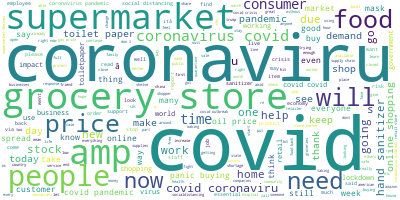

In [23]:
# Import the wordcloud library
from wordcloud import WordCloud

# Join the different processed titles together.
long_string = ','.join(list(train['processedTweet'].values))

# instantiate and create a wordcloud
wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')

wordcloud.generate(long_string)

wordcloud.to_image()

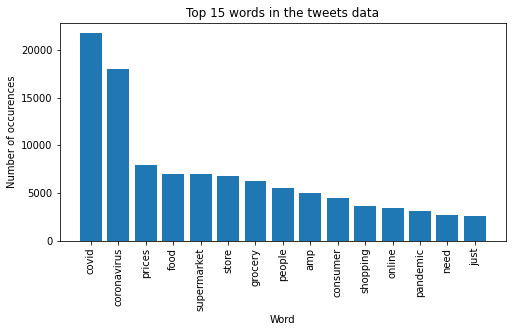

In [24]:
#plotting the most frequent words in the training dataset

from sklearn.feature_extraction.text import CountVectorizer

def get_top_n_words(corpus, n=10):
  vec = CountVectorizer(stop_words='english').fit(corpus)
  bag_of_words = vec.transform(corpus)
  sum_words = bag_of_words.sum(axis=0) 
  words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
  words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
  return words_freq[:n]

words = []
word_values = []

for i,j in get_top_n_words(train['processedTweet'],15):
  words.append(i)
  word_values.append(j)

fig, ax = plt.subplots(figsize=(8,4))
ax.bar(range(len(words)), word_values);
ax.set_xticks(range(len(words)));
ax.set_xticklabels(words, rotation='vertical');
ax.set_title('Top 15 words in the tweets data');
ax.set_xlabel('Word');
ax.set_ylabel('Number of occurences');

plt.show()

In [25]:
#some preprocessign of data for using it in the LDA model

from gensim.utils import simple_preprocess
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
stop_words.extend(['covid', 'ia', 'tco', 'http', 'amp', 'https', 'covid_', 'coronavirus', 'gt', 'covid19', 'covid2019', 'coronaviru'])

def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]


data = train.processedTweet.values.tolist()
data_words = list(sent_to_words(data))

# remove stop words
data_words = remove_stopwords(data_words)

print(data_words[:1][0][:30])

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/darshil/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['menyrbie', 'philgahan', 'chrisitv']


In [26]:
#converting the data into a dictionary of IDs and words

import gensim.corpora as corpora

# Create Dictionary
id2word = corpora.Dictionary(data_words)

# Create Corpus
texts = data_words

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1)]


In [27]:
#creating the LDA model

from pprint import pprint

num_topics = 10

# instantiate LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)

# Print the Keyword in the topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.011*"supermarket" + 0.009*"consumer" + 0.009*"store" + 0.008*"shopping" + '
  '0.008*"prices" + 0.008*"online" + 0.007*"grocery" + 0.006*"workers" + '
  '0.006*"people" + 0.005*"get"'),
 (1,
  '0.010*"sanitizer" + 0.009*"people" + 0.009*"prices" + 0.009*"food" + '
  '0.008*"supermarket" + 0.007*"hand" + 0.006*"need" + 0.006*"grocery" + '
  '0.005*"store" + 0.005*"consumer"'),
 (2,
  '0.020*"store" + 0.017*"grocery" + 0.011*"prices" + 0.011*"people" + '
  '0.007*"workers" + 0.006*"supermarket" + 0.006*"consumer" + 0.005*"work" + '
  '0.005*"online" + 0.004*"get"'),
 (3,
  '0.013*"supermarket" + 0.011*"store" + 0.011*"food" + 0.010*"grocery" + '
  '0.009*"prices" + 0.009*"people" + 0.008*"one" + 0.006*"need" + 0.006*"stay" '
  '+ 0.006*"home"'),
 (4,
  '0.014*"supermarket" + 0.011*"food" + 0.008*"consumer" + 0.007*"prices" + '
  '0.007*"us" + 0.006*"online" + 0.006*"go" + 0.005*"shopping" + 0.005*"get" + '
  '0.005*"store"'),
 (5,
  '0.018*"prices" + 0.013*"grocery" + 0.012*"st

In [28]:
import pyLDAvis.gensim_models as pgm

# Visualize the topics
pyLDAvis.enable_notebook()

vis = pgm.prepare(lda_model, corpus, id2word)
vis

/Users/darshil/opt/anaconda3/lib/python3.9/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(
/Users/darshil/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/darshil/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/darshil/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/darshil/opt/anaconda3/lib/p

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5     -0.024822 -0.002586       1        1  12.617606
3      0.012509 -0.007561       2        1  12.084406
6     -0.059805  0.005878       3        1  11.640912
8      0.009827 -0.021079       4        1  11.450172
2     -0.030893 -0.041153       5        1  10.774646
0     -0.019461 -0.014522       6        1  10.695622
9      0.044194  0.010005       7        1   9.158914
4      0.002131  0.011064       8        1   8.272987
1     -0.003853  0.076160       9        1   6.856481
7      0.070173 -0.016206      10        1   6.448254, topic_info=            Term         Freq        Total Category  logprob  loglift
44          food  6818.000000  6818.000000  Default  30.0000  30.0000
47         panic  2670.000000  2670.000000  Default  29.0000  29.0000
63   supermarket  6743.000000  6743.000000  Default  28.0000  28.0000
82     sanitizer  1845.000000  1845.000000  Default  27.0000  27.0000
295       prices  7281.000000  7281.000000  Default  26.0000  26.0000
..           ...          ...          ...      ...      ...      ...
95          know   102.056636  1168.374870  Topic10  -6.0735   0.3035
17        online   126.374240  3177.995378  Topic10  -5.8598  -0.4834
267          new   106.818333  1511.077053  Topic10  -6.0279   0.0919
295       prices   127.585970  7281.690845  Topic10  -5.8503  -1.3030
196     consumer   105.070779  4018.914604  Topic10  -6.0444  -0.9028

[916 rows x 6 columns], token_table=       Topic      Freq           Term
term                                 
7707       1  0.689347         abbott
25038      3  0.908791  abhabhattarai
20939      5  0.779794        abhijit
13302      8  0.827090         ablack
21222      4  0.903957           acnh
...      ...       ...            ...
4506       9  0.408903          wuhan
4506      10  0.038335          wuhan
11310      2  0.148147         xauusd
11310      5  0.740736         xauusd
21667     10  0.796854          yrold

[2860 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 4, 7, 9, 3, 1, 10, 5, 2, 8])

In [29]:
#please interrupt the kernel after running this cell for 2-3 minutes...
#because it seemes to cause some dependecy issues on my device due to incompatibility maybe

from gensim.models import CoherenceModel

# Compute Perplexity and coherence score
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -9.108037279741907


/Users/darshil/opt/anaconda3/lib/python3.9/site-packages/gensim/topic_coherence/text_analysis.py:441: DeprecationWarning: The 'warn' method is deprecated, use 'warning' instead
  logger.warn("stats accumulation interrupted; <= %d documents processed", self._num_docs)



Coherence Score:  0.2534697164964925


In [30]:
#assigning each tweet the most relevant topic

def format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data):
   
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data)

df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

df_dominant_topic.tail(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
41147,41147,9.0,0.8713,"food, supermarket, panic, buying, people, groc...",yâall really shitting that much more at home c...
41148,41148,4.0,0.6319,"supermarket, food, consumer, prices, us, onlin...",uv light sterilizer sanitizer for your mask an...
41149,41149,2.0,0.9399,"store, grocery, prices, people, workers, super...",still shocked by the number of toronto superma...
41150,41150,8.0,0.9437,"food, store, supermarket, online, grocery, sho...",i never that weâd be in a situation amp world ...
41151,41151,2.0,0.5082,"store, grocery, prices, people, workers, super...",mrsilverscott you are definitely my man i feel...
41152,41152,0.0,0.8999,"supermarket, consumer, store, shopping, prices...",airline pilots offering to stock supermarket s...
41153,41153,5.0,0.7423,"prices, grocery, store, food, people, supermar...",response to complaint not provided citing covi...
41154,41154,7.0,0.4745,"food, supermarket, store, grocery, people, pan...",you know itâs getting tough when kameronwilds ...
41155,41155,6.0,0.4572,"prices, people, consumer, store, grocery, oil,...",is it wrong that the smell of hand sanitizer i...
41156,41156,3.0,0.4854,"supermarket, store, food, grocery, prices, peo...",tartiicat well newused rift s are going for on...


In [31]:
#grouping the tweets by their dominant topic

df_dominant_topic.groupby('Dominant_Topic').count()

,Document_No,Topic_Perc_Contrib,Keywords,Text
Dominant_Topic,,,,
0.0,4577,4577,4577,4577
1.0,2823,2823,2823,2823
2.0,4427,4427,4427,4427
3.0,4931,4931,4931,4931
4.0,3356,3356,3356,3356
5.0,5298,5298,5298,5298
6.0,4913,4913,4913,4913
7.0,2551,2551,2551,2551
8.0,4541,4541,4541,4541


In [32]:
#merged the topics and the emotions for each tweet in one dataframe

topicEmo = df_dominant_topic
topicEmo['Emotion'] = emotions['Emotion']

topicEmo

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text,Emotion
0,0,3.0,0.7726,"supermarket, store, food, grocery, prices, peo...",menyrbie philgahan chrisitv and and,Fear
1,1,0.0,0.9526,"supermarket, consumer, store, shopping, prices...",advice talk to your neighbours family to excha...,Fear
2,2,8.0,0.9181,"food, store, supermarket, online, grocery, sho...",coronavirus australia woolworths to give elder...,Fear
3,3,3.0,0.9549,"supermarket, store, food, grocery, prices, peo...",my food stock is not the only one which is emp...,Fear
4,4,4.0,0.9571,"supermarket, food, consumer, prices, us, onlin...",me ready to go at supermarket during the covid...,Fear
...,...,...,...,...,...,...
41152,41152,0.0,0.8999,"supermarket, consumer, store, shopping, prices...",airline pilots offering to stock supermarket s...,Fear
41153,41153,5.0,0.7423,"prices, grocery, store, food, people, supermar...",response to complaint not provided citing covi...,Angry
41154,41154,7.0,0.4745,"food, supermarket, store, grocery, people, pan...",you know itâs getting tough when kameronwilds ...,Fear
41155,41155,6.0,0.4572,"prices, people, consumer, store, grocery, oil,...",is it wrong that the smell of hand sanitizer i...,Fear


In [35]:
#manually selecting top 5 topics based on the previos tables

#drops =[0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0]
drops =[1.0,2.0,4.0,7.0,9.0]

for i in drops:
    topicEmo = topicEmo[topicEmo['Dominant_Topic'] != i]

#removed tweets with fear associated with them and grouped the tweets by topics and the rest of the emotions
nonfear = topicEmo[topicEmo['Emotion'] != 'Fear']

grouped = nonfear.groupby(["Dominant_Topic", "Emotion"]).count()
grouped

Document_No  Topic_Perc_Contrib  Keywords  Text
Dominant_Topic Emotion                                                 
0.0            Angry            141                 141       141   141
               Happy            172                 172       172   172
               Sad              268                 268       268   268
5.0            Angry            176                 176       176   176
               Happy            134                 134       134   134
               Sad              262                 262       262   262
6.0            Angry            195                 195       195   195
               Happy             92                  92        92    92
               Sad              236                 236       236   236

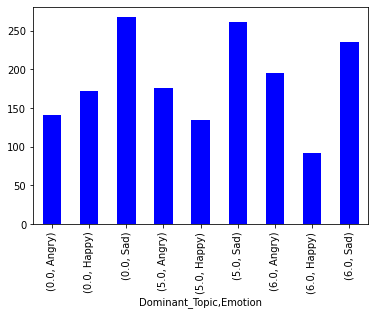

In [36]:
#ploting the top 5 topics and associated emotions

grouped.plot.bar(color="blue", legend=None)
plt.show()